In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# Importing the data

In [2]:
#Reading the csv file
df = pd.read_csv("C:/Users/Mrinal Kalita/Python Projects/Diabetes Prediction/diabetes_prediction_dataset.csv")

In [3]:
#Checking shape
df.shape

(100000, 9)

In [4]:
#Checking information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
#Checking first 5 rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data cleaning

In [6]:
#Checking Duplicate Values
df.duplicated().sum()

3854

In [7]:
#Removing dulicate values
df = df.drop_duplicates()

In [8]:
#Checking missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There is no missing values in the dataset.

In [9]:
#Coverting data types of hypertension and heart_disease to categorical
df['hypertension'] = df['hypertension'].astype('category')
df['heart_disease'] = df['heart_disease'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96146 non-null  object  
 1   age                  96146 non-null  float64 
 2   hypertension         96146 non-null  category
 3   heart_disease        96146 non-null  category
 4   smoking_history      96146 non-null  object  
 5   bmi                  96146 non-null  float64 
 6   HbA1c_level          96146 non-null  float64 
 7   blood_glucose_level  96146 non-null  int64   
 8   diabetes             96146 non-null  category
dtypes: category(3), float64(3), int64(1), object(2)
memory usage: 5.4+ MB


# Exploratory Data Analysis

<Axes: ylabel='gender'>

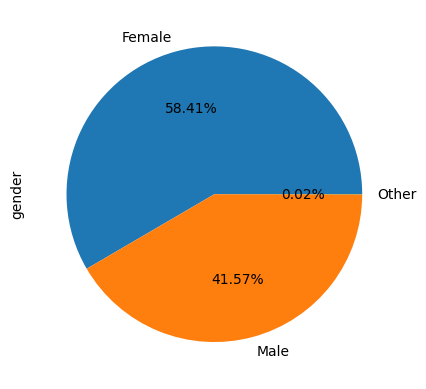

In [11]:
#Checking distribution of categorical variable gender
df['gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='heart_disease'>

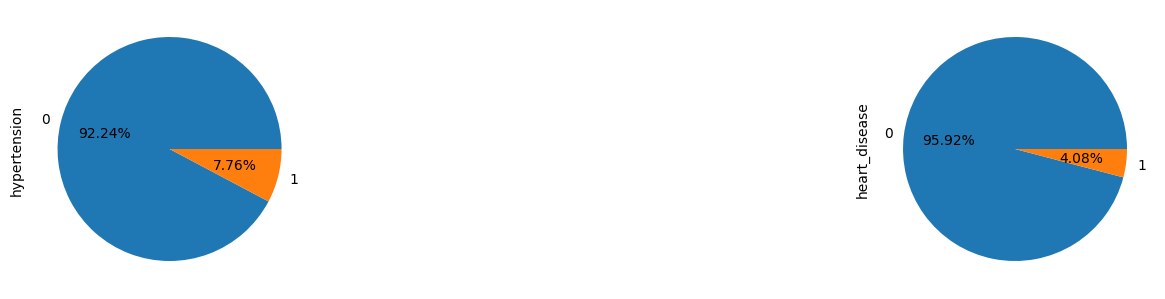

In [12]:
#Checking distribution of categorical variable hypertension and hear_diseace
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
df['hypertension'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.subplot(2,2,2)
df['heart_disease'].value_counts().plot(kind='pie', autopct='%.2f%%')

* The data is unbalanced as only 7.76% of the data is of category 1 in hypertension column.
* The data is unbalanced as only 4.08% of the data is of category 1 in heart_disease column.

<Axes: ylabel='diabetes'>

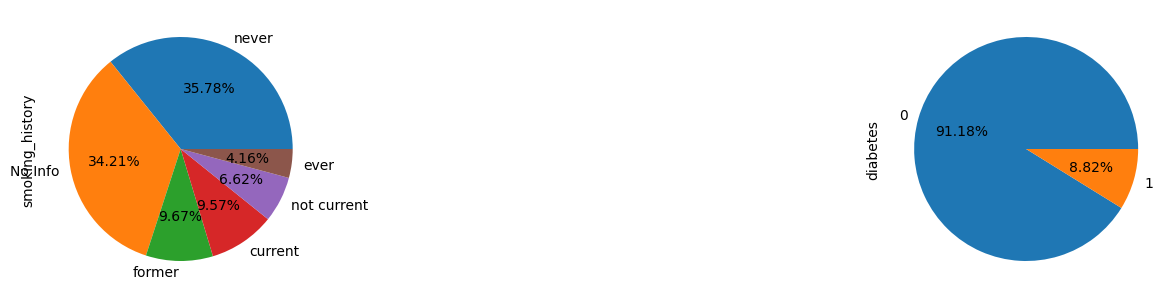

In [13]:
#Checking distribution of categorical variable smoking_history and target variable diabetes
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
df['smoking_history'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.subplot(2,2,2)
df['diabetes'].value_counts().plot(kind='pie', autopct='%.2f%%')

* Majority of the people either never smoked or there is no information about smoking.
* The is highly unbalanced as only 8.82% of the data is of category 1 and rest are category 0.

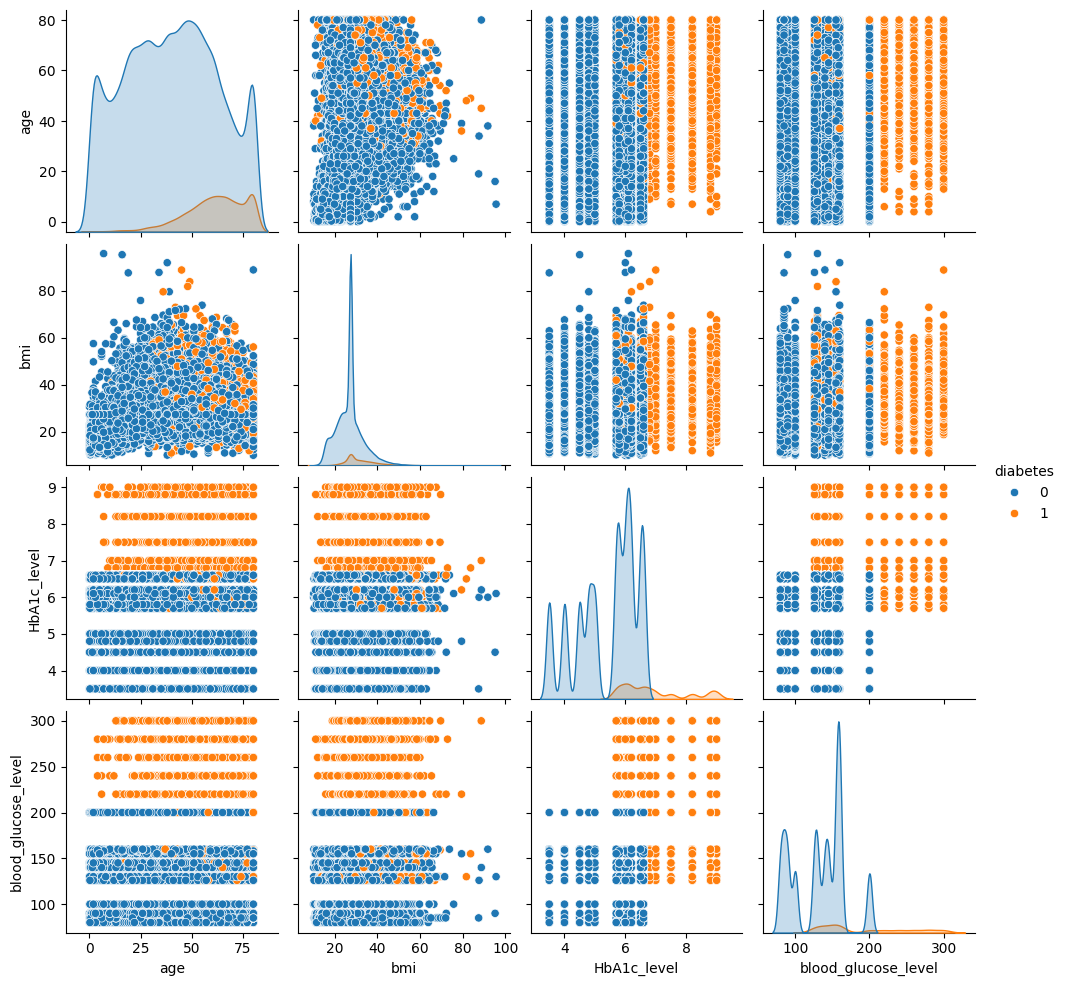

In [14]:
#Checking the distribution of continuous variable
sns.pairplot(df,hue='diabetes',diag_kind='kde')

The data is normally distributed.

<Axes: >

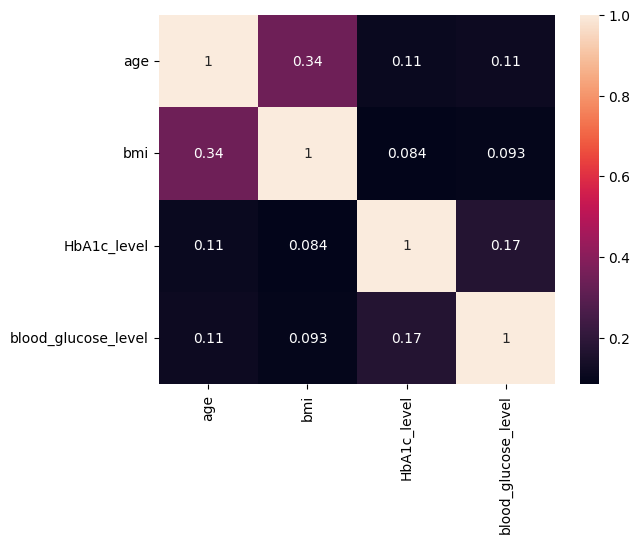

In [15]:
#Checking correlation between continous variable
sns.heatmap(df.corr(),fmt='.2g',annot=True)

There are very low correlation between the continuous variable. So all the variables are equally important.

In [16]:
#Chi square test for categorical variable
from scipy.stats import chi2_contingency
col = ['gender','hypertension', 'heart_disease', 'smoking_history']
for i in col:
    sta, p_value,dof, ex_freq = chi2_contingency(pd.crosstab(df[i],df['diabetes']))
    if p_value < 0.05:   #considering 5% confidence level
        print('There is a relationship between {y} and target variables'.format(y=i))
    else:
        print('There is no relationship between {y} and target variables'.format(y=i))

There is a relationship between gender and target variables
There is a relationship between hypertension and target variables
There is a relationship between heart_disease and target variables
There is a relationship between smoking_history and target variables


# Data Preprocessing

In [17]:
#Separating features and target variable
x = df.drop('diabetes',axis=1)
y = df['diabetes']

In [18]:
x = pd.get_dummies(x, columns=['gender','smoking_history'])

In [19]:
#Preparimg training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=1)

In [24]:
#Standardarizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [24]:
#Printing training accuracy
lr.score(x_train,y_train)

0.959540277705549

In [25]:
#Printing testing accuracy
lr.score(x_test,y_test)

0.9570982839313572

<Axes: >

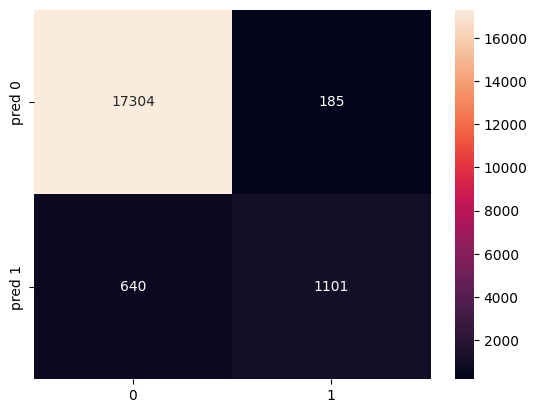

In [26]:
#Printing confusion matrix for test set
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['pred 0','pred 1'], columns =['0','1'])
sns.heatmap(cm,annot=True,fmt='.6g')

In [27]:
#Printing classification report for Training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     70175
           1       0.87      0.63      0.73      6741

    accuracy                           0.96     76916
   macro avg       0.92      0.81      0.86     76916
weighted avg       0.96      0.96      0.96     76916



In [28]:
#Printing classification report testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17489
           1       0.86      0.63      0.73      1741

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



# KNnearest Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
#Prediction on training and testing data
y_train_pred = kn.predict(x_train)
y_test_pred = kn.predict(x_test)

In [32]:
#Printing trainig accuracy
kn.score(x_train,y_train)

0.9688621353164492

In [33]:
#Printing testing accuracy
kn.score(x_test,y_test)

0.9569422776911076

<Axes: >

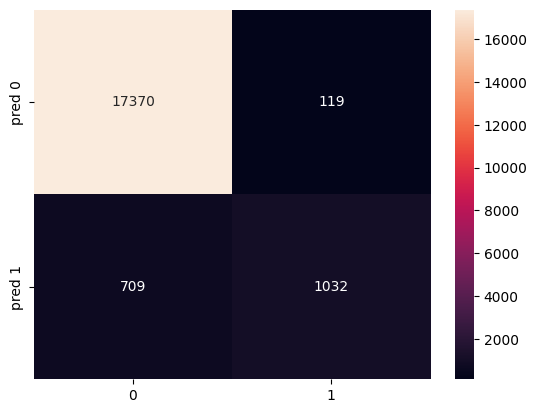

In [34]:
#Printing confusion matrix for test set
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['pred 0','pred 1'], columns =['0','1'])
sns.heatmap(cm,annot=True,fmt='.6g')

In [35]:
#Printing classifiction report of training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     70175
           1       0.95      0.68      0.79      6741

    accuracy                           0.97     76916
   macro avg       0.96      0.84      0.89     76916
weighted avg       0.97      0.97      0.97     76916



In [36]:
#Printing classification report of testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17489
           1       0.90      0.59      0.71      1741

    accuracy                           0.96     19230
   macro avg       0.93      0.79      0.85     19230
weighted avg       0.95      0.96      0.95     19230



# SVM

In [37]:
from sklearn.svm import SVC

In [38]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [39]:
#Prediction for training and testing set
y_train_pred = sv.predict(x_train)
y_test_pred = sv.predict(x_test)

In [40]:
#Printing training accuracy
sv.score(x_train,y_train)

0.962660564771959

In [41]:
#Printing testing accuracy
sv.score(x_test,y_test)

0.9589183567342694

<Axes: >

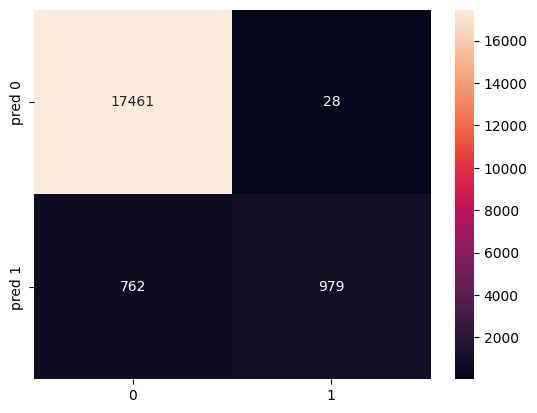

In [42]:
#Printing confusion matrix for test set
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['pred 0','pred 1'], columns =['0','1'])
sns.heatmap(cm,annot=True,fmt='.6g')

In [43]:
#Printing classification report for training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     70175
           1       0.98      0.58      0.73      6741

    accuracy                           0.96     76916
   macro avg       0.97      0.79      0.86     76916
weighted avg       0.96      0.96      0.96     76916



In [44]:
#Printing classification report for testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17489
           1       0.97      0.56      0.71      1741

    accuracy                           0.96     19230
   macro avg       0.97      0.78      0.85     19230
weighted avg       0.96      0.96      0.95     19230



# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
#prediction for training and testing set
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [48]:
#PRinting training accuracy
dt.score(x_train,y_train)

0.9991809246450674

In [49]:
#Printing training testing accuracy
dt.score(x_test,y_test)

0.9485179407176287

<Axes: >

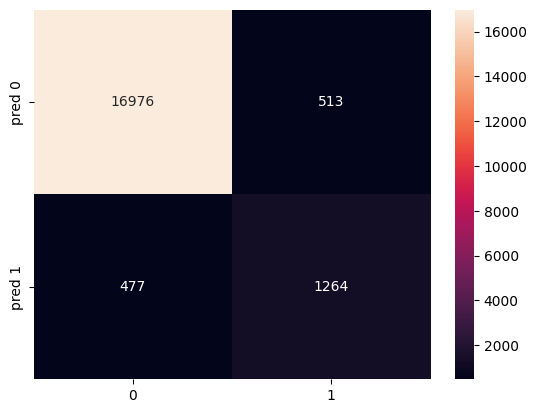

In [50]:
#Printing confusion matrix for test set
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['pred 0','pred 1'], columns =['0','1'])
sns.heatmap(cm,annot=True,fmt='.6g')

In [51]:
#Printing classification report for training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70175
           1       1.00      0.99      1.00      6741

    accuracy                           1.00     76916
   macro avg       1.00      1.00      1.00     76916
weighted avg       1.00      1.00      1.00     76916



In [52]:
#printing classification report for testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17489
           1       0.71      0.73      0.72      1741

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
#prediction for training and testing set
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [56]:
#Printing training accuracy
rf.score(x_train,y_train)

0.9991549222528473

In [57]:
#Printing testing accuracy
rf.score(x_test,y_test)

0.9666666666666667

<Axes: >

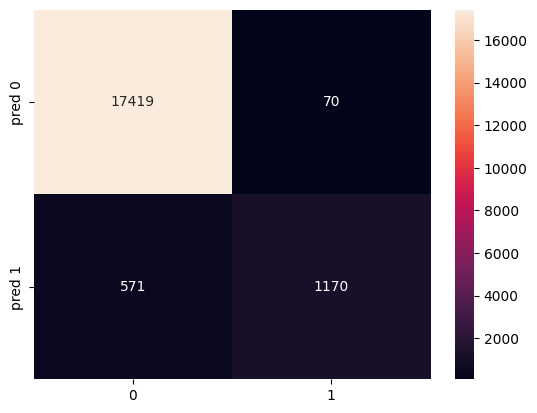

In [58]:
#Printing confusion matrix for test set
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['pred 0','pred 1'], columns =['0','1'])
sns.heatmap(cm,annot=True,fmt='.6g')

In [59]:
#printing classification reort for training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70175
           1       1.00      0.99      1.00      6741

    accuracy                           1.00     76916
   macro avg       1.00      1.00      1.00     76916
weighted avg       1.00      1.00      1.00     76916



In [60]:
#printing classification report for testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17489
           1       0.94      0.67      0.78      1741

    accuracy                           0.97     19230
   macro avg       0.96      0.83      0.88     19230
weighted avg       0.97      0.97      0.96     19230



# Ada Boost

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [63]:
#prediction for training and testing set
y_train_pred = ad.predict(x_train)
y_test_pred = ad.predict(x_test)

In [64]:
#printing training accuracy
ad.score(x_train,y_train)

0.9714883769306776

In [65]:
#printing testing accuracy
ad.score(x_test,y_test)

0.9690067602704108

<Axes: >

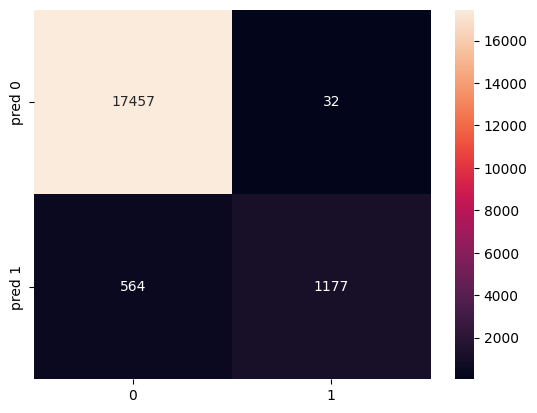

In [66]:
#Printing confusion matrix for test set
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['pred 0','pred 1'], columns =['0','1'])
sns.heatmap(cm,annot=True,fmt='.6g')

In [67]:
#printing classificationr report training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     70175
           1       0.97      0.69      0.81      6741

    accuracy                           0.97     76916
   macro avg       0.97      0.85      0.90     76916
weighted avg       0.97      0.97      0.97     76916



In [68]:
#printing classification report for testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17489
           1       0.97      0.68      0.80      1741

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



# Gradient Boost

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [71]:
#prediction for training and testing set
y_train_pred = gb.predict(x_train)
y_test_pred = gb.predict(x_test)

In [72]:
#printing training accuracy
gb.score(x_train,y_train)

0.971930417598419

In [73]:
#printing testing accuracy
gb.score(x_test,y_test)

0.9684867394695788

<Axes: >

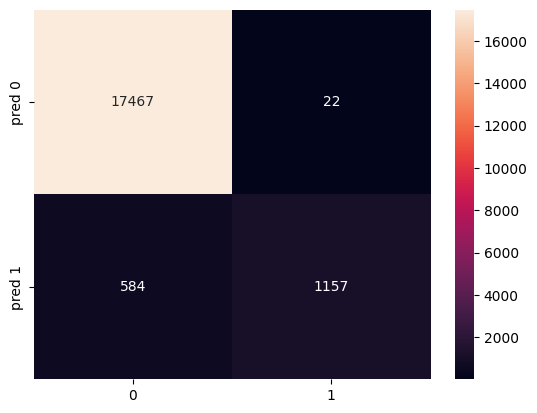

In [74]:
#Printing confusion matrix for test set
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['pred 0','pred 1'], columns =['0','1'])
sns.heatmap(cm,annot=True,fmt='.6g')

In [75]:
#Printing classification report for training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     70175
           1       0.99      0.69      0.81      6741

    accuracy                           0.97     76916
   macro avg       0.98      0.84      0.90     76916
weighted avg       0.97      0.97      0.97     76916



In [76]:
#printing classification report for testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17489
           1       0.98      0.66      0.79      1741

    accuracy                           0.97     19230
   macro avg       0.97      0.83      0.89     19230
weighted avg       0.97      0.97      0.97     19230



We can see that out of all the models build, ada boost model performs bettter which has macro f1 score of 0.89 and train and test accuracy is also same, that means the model is not overfitiing.

In [78]:
#Saving the the trained model
import pickle
filename = 'finalized_model.sav'
pickle.dump(ad, open(filename, 'wb'))

In [79]:
#Saving the standardized model
filename1 = 'scaled_model.sav'
pickle.dump(sc,open(filename1,'wb'))

In [19]:
x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0


In [ ]:
!streamlit run diabetes_prediction_web_app.py